In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
data = pd.read_csv('telecom_churn_data.csv')

In [4]:
#data.describe()

In [5]:
#data.columns

In [6]:
print(data.shape)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
# data.isnull().sum().sort_values()/data.shape[0]*100 > 73
data.head(5)

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [7]:
#data.mobile_number.unique().size

In [8]:
#sample = data.head()
#months_data = sample.filter(like='rech')
#months_data

In [9]:
data['average_recharge']=(data.total_rech_amt_6+data.total_rech_amt_7)/2

In [10]:
data.average_recharge.describe(percentiles=[0.7,0.9,0.99,0.999,0.999999])

count       99999.000000
mean          325.238792
std           370.833466
min             0.000000
50%           229.000000
70%           368.500000
90%           698.000000
99%          1590.000000
99.9%        3037.514000
99.9999%    35861.288025
max         37762.500000
Name: average_recharge, dtype: float64

In [11]:
max_revenue_customers_data = data[data.average_recharge >368.5]

In [12]:
#max_revenue_customers_data.shape

In [13]:
max_revenue_customers_data['churn'] = np.where(max_revenue_customers_data['total_ic_mou_9'] + max_revenue_customers_data['total_og_mou_9']+max_revenue_customers_data['vol_2g_mb_9']+max_revenue_customers_data['vol_3g_mb_9'] == 0, 1, 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
#max_revenue_customers_data.head()

In [15]:
max_revenue_customers_data_clean = max_revenue_customers_data[max_revenue_customers_data.columns.drop(list(max_revenue_customers_data.filter(like='_9')))]

In [16]:
#max_revenue_customers_data_clean.shape

In [17]:
c1 = set(list(max_revenue_customers_data_clean.columns))

In [18]:
#max_revenue_customers_data_clean.isnull().sum().sort_values()

In [19]:
max_revenue_customers_data_clean_no_dates = max_revenue_customers_data_clean[max_revenue_customers_data_clean.columns.drop(list(max_revenue_customers_data_clean.filter(like='date')))]

In [20]:
df_clean1 = max_revenue_customers_data_clean.loc[:, (max_revenue_customers_data_clean != max_revenue_customers_data_clean.iloc[0]).any()]

In [21]:
#df_clean1.shape

In [22]:
round(df_clean1.isnull().sum()/len(df_clean1.index), 2)*100

mobile_number            0.0
loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
last_date_of_month_7     0.0
last_date_of_month_8     1.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              1.0
onnet_mou_7              1.0
onnet_mou_8              3.0
offnet_mou_6             1.0
offnet_mou_7             1.0
offnet_mou_8             3.0
roam_ic_mou_6            1.0
roam_ic_mou_7            1.0
roam_ic_mou_8            3.0
roam_og_mou_6            1.0
roam_og_mou_7            1.0
roam_og_mou_8            3.0
loc_og_t2t_mou_6         1.0
loc_og_t2t_mou_7         1.0
loc_og_t2t_mou_8         3.0
loc_og_t2m_mou_6         1.0
loc_og_t2m_mou_7         1.0
loc_og_t2m_mou_8         3.0
loc_og_t2f_mou_6         1.0
loc_og_t2f_mou_7         1.0
loc_og_t2f_mou_8         3.0
                        ... 
arpu_3g_7               61.0
arpu_3g_8               61.0
arpu_2g_6               62.0
arpu_2g_7     

In [23]:
missing_columns = df_clean1.columns[100*(df_clean1.isnull().sum()/len(df_clean1.index)) > 60]

In [24]:
missing_columns

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

In [25]:
df_clean1[df_clean1.total_rech_data_6.isnull()].head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,average_recharge,churn
7,7000701601,0.0,0.0,0.0,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,0.0,0.0,0.0,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,...,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,...,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,7/31/2014,8/31/2014,690.008,18.980,25.499,1185.91,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,0


In [26]:
df_clean1['total_rech_data_6'] = df_clean1['total_rech_data_6'].replace(np.nan, 0)
df_clean1['total_rech_data_7'] = df_clean1['total_rech_data_7'].replace(np.nan, 0)
df_clean1['total_rech_data_8'] = df_clean1['total_rech_data_8'].replace(np.nan, 0)
df_clean1['av_rech_amt_data_6'] = df_clean1['av_rech_amt_data_6'].replace(np.nan, 0)
df_clean1['av_rech_amt_data_7'] = df_clean1['av_rech_amt_data_7'].replace(np.nan, 0)
df_clean1['av_rech_amt_data_8'] = df_clean1['av_rech_amt_data_8'].replace(np.nan, 0)
df_clean1['max_rech_data_6'] = df_clean1['max_rech_data_6'].replace(np.nan, 0)
df_clean1['max_rech_data_7'] = df_clean1['max_rech_data_7'].replace(np.nan, 0)
df_clean1['max_rech_data_8'] = df_clean1['max_rech_data_8'].replace(np.nan, 0)

df_clean1['night_pck_user_6'] = df_clean1['night_pck_user_6'].replace(np.nan, -1)
df_clean1['night_pck_user_7'] = df_clean1['night_pck_user_7'].replace(np.nan, -1)
df_clean1['night_pck_user_8'] = df_clean1['night_pck_user_8'].replace(np.nan, -1)
df_clean1['fb_user_6'] = df_clean1['fb_user_6'].replace(np.nan, -1)
df_clean1['fb_user_7'] = df_clean1['fb_user_7'].replace(np.nan, -1)
df_clean1['fb_user_8'] = df_clean1['fb_user_8'].replace(np.nan, -1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [27]:
missing_columns = df_clean1.columns[100*(df_clean1.isnull().sum()/len(df_clean1.index)) > 60]
df_clean1.to_csv('df_clean1.csv')

In [28]:
df_clean1.drop(missing_columns,axis=1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
df_clean1.shape

(29979, 157)

In [30]:
round(df_clean1.isnull().sum()/len(df_clean1.index), 2)*100

mobile_number           0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_7    0.0
last_date_of_month_8    1.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             1.0
onnet_mou_7             1.0
onnet_mou_8             3.0
offnet_mou_6            1.0
offnet_mou_7            1.0
offnet_mou_8            3.0
roam_ic_mou_6           1.0
roam_ic_mou_7           1.0
roam_ic_mou_8           3.0
roam_og_mou_6           1.0
roam_og_mou_7           1.0
roam_og_mou_8           3.0
loc_og_t2t_mou_6        1.0
loc_og_t2t_mou_7        1.0
loc_og_t2t_mou_8        3.0
loc_og_t2m_mou_6        1.0
loc_og_t2m_mou_7        1.0
loc_og_t2m_mou_8        3.0
loc_og_t2f_mou_6        1.0
loc_og_t2f_mou_7        1.0
loc_og_t2f_mou_8        3.0
                       ... 
vol_2g_mb_7             0.0
vol_2g_mb_8             0.0
vol_3g_mb_6             0.0
vol_3g_mb_7             0.0
vol_3g_mb_8         

In [31]:
#df_clean2.info

In [32]:
df_clean1.to_csv('df_clean2.csv')

In [33]:
#missing_columns = df_clean1.columns[100*(df_clean1.isnull().sum()/len(df_clean1.index)) > 0]

In [34]:
#missing_columns

In [35]:
df_clean1 = df_clean1.fillna(df_clean1.median()).dropna(axis=1, how='all')

In [36]:
#df_clean1.shape

In [37]:
round(df_clean1.isnull().sum()/len(df_clean1.index), 2)*100 

mobile_number           0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_7    0.0
last_date_of_month_8    1.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8        0.0
loc_og_t2f_mou_6        0.0
loc_og_t2f_mou_7        0.0
loc_og_t2f_mou_8        0.0
                       ... 
vol_2g_mb_7             0.0
vol_2g_mb_8             0.0
vol_3g_mb_6             0.0
vol_3g_mb_7             0.0
vol_3g_mb_8         

In [38]:
missing_columns = df_clean1.columns[100*(df_clean1.isnull().sum()/len(df_clean1.index)) > 0]

In [39]:
#missing_columns
df_clean1.to_csv('df_clean3.csv')

In [40]:
df_clean1.drop(missing_columns, axis =1, inplace=True)

In [41]:
missing_columns = df_clean1.columns[100*(df_clean1.isnull().sum()/len(df_clean1.index)) > 0]
missing_columns

Index([], dtype='object')

In [42]:
df_clean1.shape

(29979, 152)

In [43]:
#df_clean3.to_csv('df_clean3.csv')
#df_clean4.shape

In [44]:
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [45]:
X = df_clean1.drop(['churn','mobile_number'],axis=1)
y = df_clean1['churn']

In [46]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [47]:
#import statsmodels.api as sm

In [48]:
#logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#logm1.fit().summary()

In [49]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
# Let's see the correlation matrix 
#plt.figure(figsize = (20,10))        # Size of the figure
#sns.heatmap(df_clean1.corr().abs(),annot = True)

In [51]:
#corr = df_clean1.corr().abs()
#corr.shape

In [52]:
#corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
#corr_triu.head()

In [53]:
#corr_triu = corr_triu.stack()
#len(set(list(corr_triu[corr_triu > 0.2].to_frame().reset_index().level_1)))

In [54]:
#df_clean1.filter(like='total').columns

In [55]:
#df_clean4['t2t_total_6']=df_clean4['loc_og_t2t_mou_6']+df_clean4['std_og_t2t_mou_6']+df_clean4['loc_ic_t2t_mou_6']+df_clean4['std_ic_t2t_mou_6']
#df_clean4['t2t_total_7']=df_clean4['loc_og_t2t_mou_7']+df_clean4['std_og_t2t_mou_7']+df_clean4['loc_ic_t2t_mou_7']+df_clean4['std_ic_t2t_mou_7']
#df_clean4['t2t_total_8']=df_clean4['loc_og_t2t_mou_8']+df_clean4['std_og_t2t_mou_8']+df_clean4['loc_ic_t2t_mou_8']+df_clean4['std_ic_t2t_mou_8']

In [56]:
#df_clean4.filter(like='_6').head()

In [57]:
#og = df_clean4.filter(like='og').filter(like='_6')

In [58]:
#og.head()

In [59]:
#og_wo_t = og.drop(labels='total_og_mou_6', axis=1 )

In [60]:
#og_wo_t.sum(axis=1) - df_clean4

In [61]:
total_for_june = df_clean1.filter(regex='total.*_6')

In [62]:
df_clean1.to_csv('df_clean5.csv')

In [63]:
df_clean1['total_og_mou_diff_7_6'] = df_clean1.total_og_mou_7 - df_clean1.total_og_mou_6
df_clean1['total_og_mou_diff_8_7'] = df_clean1.total_og_mou_8 - df_clean1.total_og_mou_7

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


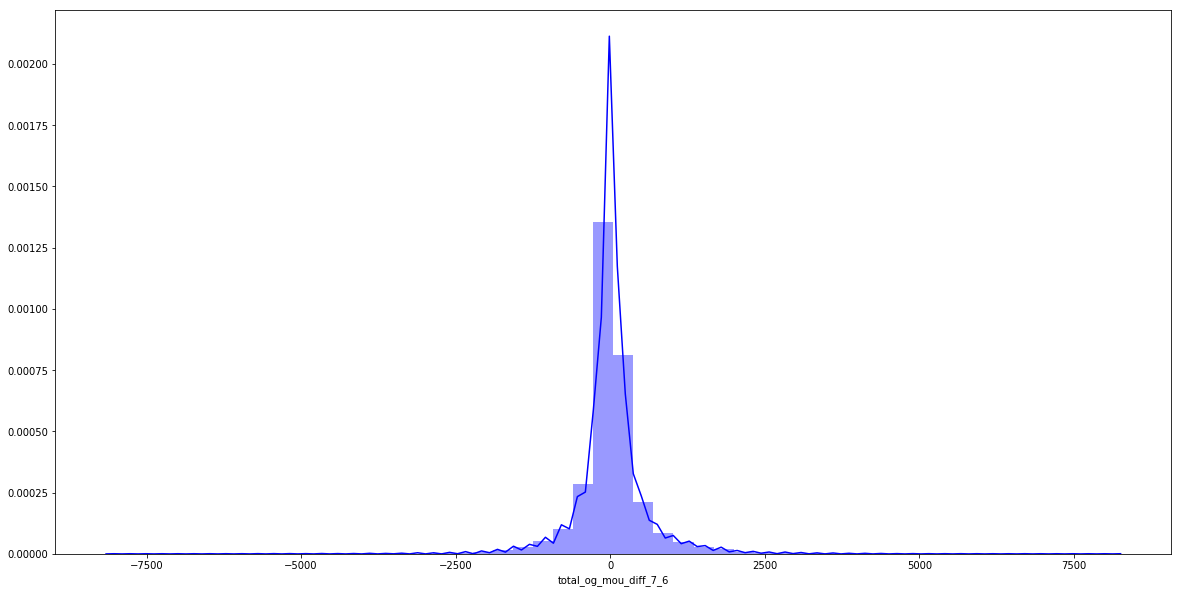

In [68]:
plt.figure(figsize=(20,10))
sns.distplot(df_clean1['total_og_mou_diff_7_6'], color='b' )

In [69]:
df_clean1[['churn', 'total_og_mou_diff_8_7', 'total_og_mou_diff_7_6']].head(10)

,churn,total_og_mou_diff_8_7,total_og_mou_diff_7_6
7,1,-259.08,121.71
8,0,-260.10,-76.70
13,0,822.85,-714.68
16,0,-52.63,-60.80
17,0,-0.81,-1248.72
21,0,39.75,168.45
24,0,-22.04,-138.95
33,0,0.56,0.00
38,0,93.65,332.68
41,0,-183.37,81.75
